# Recreate the Brain Imaging

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd

In [2]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# threshold the G graph at the cost 2
H = G.threshold(10)

## get the centroids for each node

In [4]:
def get_centroids(self):
    """
        return dict(0:np.array(1,2,3), 1:np.array(9,8,7) ... )
    """
    if self.graph["centroids"] == False:
        print ("Boy, there are no centroids for the graph")
        return
    
    dict_centroids = dict()
    for i, node in enumerate(H.nodes()):
        dict_centroids[i] = H.node[i]["centroids"]
    
    return dict_centroids

In [5]:
dict_centroids = get_centroids(H)

In [6]:
dict_centroids

{0: array([-56.40355 , -40.152663,   1.708876]),
 1: array([-53.140506, -49.843038,   8.264557]),
 2: array([-5.001684, 20.645903, 25.733446]),
 3: array([-33.265925,  20.200202,  45.347826]),
 4: array([-31.958115,   2.146597,  51.26911 ]),
 5: array([-38.795007,  12.584757,  33.278581]),
 6: array([-39.715079,  11.341351,  48.846438]),
 7: array([ -8.609127, -73.360119,  17.095238]),
 8: array([ -5.3042  , -87.102157,  19.323496]),
 9: array([-24.010774,  -5.86141 , -32.826641]),
 10: array([-30.237677, -46.493585, -17.452397]),
 11: array([-34.771765,  -9.299608, -35.172549]),
 12: array([-33.515847, -72.220765, -14.257923]),
 13: array([-37.632472, -38.758481, -22.9063  ]),
 14: array([-38.896698, -60.874682, -16.663844]),
 15: array([-43.393728, -58.809524,  40.471545]),
 16: array([-35.980519, -83.125541,  18.926407]),
 17: array([-44.904486, -56.280753,  17.439942]),
 18: array([-31.993691, -75.483701,  33.056782]),
 19: array([-43.132353, -66.558824,  15.90625 ]),
 20: array([-

In [7]:
# test the above mentioned function
trus = 0
fals = 0
for i, node in enumerate(H.nodes()):
    if np.array_equal(H.node[i]["centroids"], dict_centroids[i]):
        trus += 1
    else:
        fals += 1
assert (trus == len(H.nodes())), ("Wrong calculated get_centroids")

In [8]:
aaa = H.report_nodal_measures()

----------------------------

## Prepare my-favourite-lovely-please-work input for plotting brains

In [16]:
# get the edges of the graph 
edge_list = list(H.edges())

In [17]:
edge_list

[(0, 1),
 (0, 57),
 (0, 133),
 (0, 54),
 (0, 39),
 (0, 13),
 (0, 67),
 (0, 19),
 (0, 28),
 (0, 34),
 (0, 17),
 (0, 26),
 (0, 6),
 (0, 118),
 (0, 12),
 (0, 56),
 (0, 94),
 (0, 66),
 (0, 14),
 (0, 10),
 (0, 102),
 (0, 120),
 (0, 135),
 (0, 3),
 (0, 65),
 (0, 92),
 (0, 15),
 (0, 222),
 (0, 142),
 (0, 253),
 (0, 209),
 (0, 250),
 (0, 210),
 (0, 103),
 (0, 100),
 (0, 68),
 (0, 53),
 (0, 190),
 (0, 193),
 (0, 278),
 (0, 248),
 (0, 291),
 (0, 246),
 (0, 98),
 (0, 38),
 (0, 119),
 (0, 294),
 (1, 17),
 (1, 142),
 (1, 19),
 (1, 39),
 (1, 67),
 (1, 193),
 (1, 34),
 (1, 248),
 (1, 133),
 (1, 278),
 (1, 26),
 (1, 210),
 (1, 56),
 (1, 66),
 (1, 13),
 (1, 14),
 (1, 101),
 (1, 12),
 (1, 135),
 (1, 22),
 (1, 232),
 (1, 155),
 (1, 153),
 (1, 15),
 (1, 54),
 (1, 92),
 (1, 234),
 (1, 6),
 (1, 172),
 (1, 103),
 (1, 159),
 (1, 42),
 (1, 124),
 (1, 111),
 (1, 129),
 (1, 37),
 (1, 120),
 (1, 57),
 (1, 128),
 (1, 180),
 (1, 84),
 (1, 222),
 (1, 244),
 (1, 246),
 (1, 91),
 (1, 139),
 (1, 127),
 (1, 73),
 (1, 85

In [18]:
# get the nodes of the graph
node_list = sorted(H.nodes())

In [19]:
node_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [20]:
H.number_of_edges()

4728

In [21]:
H.number_of_nodes()

308

In [22]:
len(edge_list)

4728

In [23]:
len(node_list)

308

In [24]:
H.edges[0,57]

{'weight': 1}

In [25]:
# settign attributes to edges
H.edges[0, 57]['color'] = "pink"

In [26]:
H.edges[0,57]

{'color': 'pink', 'weight': 1}

-----------------------------------------------------------------------

## Draw Graph.nodes cool af  
draw_networkx_nodes(G, pos, nodelist=None, node_size=300, node_color='r', node_shape='o', alpha=1.0, cmap=None, vmin=None, vmax=None, ax=None, linewidths=None, label=None, **kwds)

** Calculate nodal measures ** 

In [27]:
# Two dictionaries represent the resulting nodal partition of G. 
# The first maps nodes to modules and the second maps modules to nodes.

nodal_partition, module_partition = H.partition()

In [28]:
len(module_partition) # means I have 10 diffrent modules (groups of nodes after partitioning) ??

4

In [29]:
# show me diffrent module partitions of graph and nodes belonging to these partitions 
H.graph["partition"]

{0: [0,
  1,
  7,
  8,
  10,
  12,
  13,
  14,
  16,
  17,
  19,
  21,
  22,
  24,
  26,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  38,
  39,
  44,
  45,
  46,
  47,
  48,
  49,
  54,
  56,
  57,
  59,
  69,
  70,
  79,
  80,
  90,
  92,
  93,
  94,
  96,
  122,
  135,
  142,
  152,
  153,
  160,
  161,
  163,
  165,
  167,
  169,
  172,
  181,
  183,
  184,
  185,
  187,
  189,
  191,
  192,
  193,
  198,
  199,
  200,
  201,
  202,
  203,
  210,
  211,
  213,
  225,
  226,
  227,
  236,
  237,
  242,
  247,
  248,
  250,
  252,
  253,
  278],
 1: [2,
  9,
  11,
  23,
  25,
  27,
  40,
  41,
  42,
  43,
  50,
  51,
  52,
  53,
  55,
  58,
  64,
  66,
  72,
  82,
  97,
  101,
  131,
  132,
  133,
  134,
  136,
  137,
  139,
  141,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  154,
  162,
  164,
  166,
  178,
  180,
  182,
  194,
  195,
  196,
  197,
  204,
  205,
  206,
  207,
  208,
  209,
  212,
  214,
  221,
  229,
  254,
  255,
  288,
  290,
  291,
  292,
  293,
 

In [30]:
# use the class method to calculate nodal measures
H.calculate_nodal_measures()

In [31]:
# report the nodal attributes of Graph
nodal_measures = H.report_nodal_measures()

In [32]:
nodal_measures

name                             centroids  \
0                   lh_bankssts_part1     [-56.40355, -40.152663, 1.708876]   
1                   lh_bankssts_part2    [-53.140506, -49.843038, 8.264557]   
2    lh_caudalanteriorcingulate_part1     [-5.001684, 20.645903, 25.733446]   
3        lh_caudalmiddlefrontal_part1    [-33.265925, 20.200202, 45.347826]   
4        lh_caudalmiddlefrontal_part2      [-31.958115, 2.146597, 51.26911]   
5        lh_caudalmiddlefrontal_part3    [-38.795007, 12.584757, 33.278581]   
6        lh_caudalmiddlefrontal_part4    [-39.715079, 11.341351, 48.846438]   
7                     lh_cuneus_part1    [-8.609127, -73.360119, 17.095238]   
8                     lh_cuneus_part2      [-5.3042, -87.102157, 19.323496]   
9                 lh_entorhinal_part1    [-24.010774, -5.86141, -32.826641]   
10                  lh_fusiform_part1  [-30.237677, -46.493585, -17.452397]   
11                  lh_fusiform_part2   [-34.771765, -9.299608, -35.172549]   
12                  lh_fusiform_part3  [-33.515847, -72.220765, -14.257923]   
13                  lh_fusiform_part4    [-37.632472, -38.758481, -22.9063]   
14                  lh_fusiform_part5  [-38.896698, -60.874682, -16.663844]   
15          lh_inferiorparietal_part1   [-43.393728, -58.809524, 40.471545]   
16          lh_inferiorparietal_part2   [-35.980519, -83.125541, 18.926407]   
17          lh_inferiorparietal_part3   [-44.904486, -56.280753, 17.439942]   
18          lh_inferiorparietal_part4   [-31.993691, -75.483701, 33.056782]   
19          lh_inferiorparietal_part5    [-43.132353, -66.558824, 15.90625]   
20          lh_inferiorparietal_part6   [-37.122661, -69.533264, 43.258836]   
21          lh_inferiorparietal_part7    [-43.26638, -75.049409, 23.400644]   
22          lh_inferiorparietal_part8   [-45.069149, -64.283245, 32.022606]   
23          lh_inferiortemporal_part1   [-43.614049, -6.016575, -40.149171]   
24          lh_inferiortemporal_part2   [-50.245499, -60.608838, -7.837971]   
25          lh_inferiortemporal_part3  [-48.242567, -19.479656, -32.479656]   
26          lh_inferiortemporal_part4  [-52.185499, -51.758004, -16.904896]   
27          lh_inferiortemporal_part5   [-52.818271, -31.30943, -26.385069]   
28          lh_inferiortemporal_part6  [-52.835546, -41.770174, -22.660878]   
29          lh_isthmuscingulate_part1     [-8.616947, -48.171793, 7.731863]   
..                                ...                                   ...   
278         rh_superiorparietal_part1     [23.584713, -81.495541, 24.36051]   
279         rh_superiorparietal_part2    [14.988916, -47.232759, 68.312808]   
280         rh_superiorparietal_part3     [15.733461, -85.22627, 34.587728]   
281         rh_superiorparietal_part4    [22.034121, -75.393701, 40.053806]   
282         rh_superiorparietal_part5    [23.849231, -65.156923, 38.592308]   
283         rh_superiorparietal_part6    [29.590909, -46.771562, 61.291375]   
284         rh_superiorparietal_part7          [13.05875, -68.865, 53.7025]   
285         rh_superiorparietal_part8    [33.208925, -44.119675, 46.361055]   
286         rh_superiorparietal_part9     [18.519651, -59.15393, 61.758734]   
287        rh_superiorparietal_part10    [30.873267, -53.879208, 51.443564]   
288         rh_superiortemporal_part1    [45.127378, 10.190275, -23.683404]   
289         rh_superiortemporal_part2     [60.395197, -31.749636, 9.372635]   
290         rh_superiortemporal_part3     [53.179974, 1.882853, -14.544503]   
291         rh_superiortemporal_part4      [56.760262, -7.716835, -6.30815]   
292         rh_superiortemporal_part5     [59.154909, -22.562182, 3.008727]   
293         rh_superiortemporal_part6    [51.438479, -17.538404, -3.435496]   
294            rh_supramarginal_part1     [42.910714, -34.25487, 40.887987]   
295            rh_supramarginal_part2     [45.033989, -24.93381, 18.411449]   
296            rh_supramarginal_part3     [52.15208, -41.395983, 41.955524]   
297 

In [26]:
nodal_measures.loc[nodal_measures["module"] == 9, :]

Empty DataFrame
Columns: [name, centroids, betweenness, closeness, clustering, degree, module, participation_coefficient, shortest_path_length, x, y, z]
Index: []

In [25]:
# use the graph_measures/calculate_nodal_measures to calculate_nodal_measures
from scona.graph_measures import calculate_nodal_measures

In [26]:
test = G.threshold(2)

In [27]:
calculate_nodal_measures(test)

In [28]:
test.report_nodal_measures()

name                             centroids  \
0                   lh_bankssts_part1     [-56.40355, -40.152663, 1.708876]   
1                   lh_bankssts_part2    [-53.140506, -49.843038, 8.264557]   
2    lh_caudalanteriorcingulate_part1     [-5.001684, 20.645903, 25.733446]   
3        lh_caudalmiddlefrontal_part1    [-33.265925, 20.200202, 45.347826]   
4        lh_caudalmiddlefrontal_part2      [-31.958115, 2.146597, 51.26911]   
5        lh_caudalmiddlefrontal_part3    [-38.795007, 12.584757, 33.278581]   
6        lh_caudalmiddlefrontal_part4    [-39.715079, 11.341351, 48.846438]   
7                     lh_cuneus_part1    [-8.609127, -73.360119, 17.095238]   
8                     lh_cuneus_part2      [-5.3042, -87.102157, 19.323496]   
9                 lh_entorhinal_part1    [-24.010774, -5.86141, -32.826641]   
10                  lh_fusiform_part1  [-30.237677, -46.493585, -17.452397]   
11                  lh_fusiform_part2   [-34.771765, -9.299608, -35.172549]   
12                  lh_fusiform_part3  [-33.515847, -72.220765, -14.257923]   
13                  lh_fusiform_part4    [-37.632472, -38.758481, -22.9063]   
14                  lh_fusiform_part5  [-38.896698, -60.874682, -16.663844]   
15          lh_inferiorparietal_part1   [-43.393728, -58.809524, 40.471545]   
16          lh_inferiorparietal_part2   [-35.980519, -83.125541, 18.926407]   
17          lh_inferiorparietal_part3   [-44.904486, -56.280753, 17.439942]   
18          lh_inferiorparietal_part4   [-31.993691, -75.483701, 33.056782]   
19          lh_inferiorparietal_part5    [-43.132353, -66.558824, 15.90625]   
20          lh_inferiorparietal_part6   [-37.122661, -69.533264, 43.258836]   
21          lh_inferiorparietal_part7    [-43.26638, -75.049409, 23.400644]   
22          lh_inferiorparietal_part8   [-45.069149, -64.283245, 32.022606]   
23          lh_inferiortemporal_part1   [-43.614049, -6.016575, -40.149171]   
24          lh_inferiortemporal_part2   [-50.245499, -60.608838, -7.837971]   
25          lh_inferiortemporal_part3  [-48.242567, -19.479656, -32.479656]   
26          lh_inferiortemporal_part4  [-52.185499, -51.758004, -16.904896]   
27          lh_inferiortemporal_part5   [-52.818271, -31.30943, -26.385069]   
28          lh_inferiortemporal_part6  [-52.835546, -41.770174, -22.660878]   
29          lh_isthmuscingulate_part1     [-8.616947, -48.171793, 7.731863]   
..                                ...                                   ...   
278         rh_superiorparietal_part1     [23.584713, -81.495541, 24.36051]   
279         rh_superiorparietal_part2    [14.988916, -47.232759, 68.312808]   
280         rh_superiorparietal_part3     [15.733461, -85.22627, 34.587728]   
281         rh_superiorparietal_part4    [22.034121, -75.393701, 40.053806]   
282         rh_superiorparietal_part5    [23.849231, -65.156923, 38.592308]   
283         rh_superiorparietal_part6    [29.590909, -46.771562, 61.291375]   
284         rh_superiorparietal_part7          [13.05875, -68.865, 53.7025]   
285         rh_superiorparietal_part8    [33.208925, -44.119675, 46.361055]   
286         rh_superiorparietal_part9     [18.519651, -59.15393, 61.758734]   
287        rh_superiorparietal_part10    [30.873267, -53.879208, 51.443564]   
288         rh_superiortemporal_part1    [45.127378, 10.190275, -23.683404]   
289         rh_superiortemporal_part2     [60.395197, -31.749636, 9.372635]   
290         rh_superiortemporal_part3     [53.179974, 1.882853, -14.544503]   
291         rh_superiortemporal_part4      [56.760262, -7.716835, -6.30815]   
292         rh_superiortemporal_part5     [59.154909, -22.562182, 3.008727]   
293         rh_superiortemporal_part6    [51.438479, -17.538404, -3.435496]   
294            rh_supramarginal_part1     [42.910714, -34.25487, 40.887987]   
295            rh_supramarginal_part2     [45.033989, -24.93381, 18.411449]   
296            rh_supramarginal_part3     [52.15208, -41.395983, 41.955524]   
297 

**Result**: the graph_measures/calculate_nodal_measures calculates nodal measures without measure "module" and "participation_coefficient"

# Now the Real Stuff to do

draw_networkx_nodes(G, pos ...)  

pos - A dictionary with nodes as keys and positions as values. Positions should be sequences of length 2.

In [33]:
orientation = "axial"

In [34]:
# this is needed for getting the coordinates based on the orientation

import importlib.util
spec = importlib.util.spec_from_file_location("anatomical_layout", "/home/pilot/GSoC/scona/scona/brain_imaging.py")
bar = importlib.util.module_from_spec(spec)
spec.loader.exec_module(bar)

In [35]:
# make the position of each node in the orientation we need

pos = dict()

for node in H.nodes:
    pos[node]=bar.anatomical_layout(H.node[node]['x'], H.node[node]['y'], H.node[node]['z'], orientation=orientation)

In [36]:
H.node[0]["z"]

1.708876

In [ ]:
dict_centroids[0]

In [38]:
pos

{0: array([-56.40355 , -40.152663]),
 1: array([-53.140506, -49.843038]),
 2: array([-5.001684, 20.645903]),
 3: array([-33.265925,  20.200202]),
 4: array([-31.958115,   2.146597]),
 5: array([-38.795007,  12.584757]),
 6: array([-39.715079,  11.341351]),
 7: array([ -8.609127, -73.360119]),
 8: array([ -5.3042  , -87.102157]),
 9: array([-24.010774,  -5.86141 ]),
 10: array([-30.237677, -46.493585]),
 11: array([-34.771765,  -9.299608]),
 12: array([-33.515847, -72.220765]),
 13: array([-37.632472, -38.758481]),
 14: array([-38.896698, -60.874682]),
 15: array([-43.393728, -58.809524]),
 16: array([-35.980519, -83.125541]),
 17: array([-44.904486, -56.280753]),
 18: array([-31.993691, -75.483701]),
 19: array([-43.132353, -66.558824]),
 20: array([-37.122661, -69.533264]),
 21: array([-43.26638 , -75.049409]),
 22: array([-45.069149, -64.283245]),
 23: array([-43.614049,  -6.016575]),
 24: array([-50.245499, -60.608838]),
 25: array([-48.242567, -19.479656]),
 26: array([-52.185499, 

** SUPER!!! 1 Required Parameter is ready. Time to Figure out nodes_order **

In [39]:
    # We're going to figure out the best way to plot these nodes
    # so that they're sensibly on top of each other

In [40]:
sort_dict = {}
sort_dict['axial'] = 'z'
sort_dict['coronal'] = 'y'
sort_dict['sagittal'] = 'x'

if **"axial"** - sort by z  (so we sort nodes in ascending order based on the **Z** coordinate of a node  
( plot the most inferior nodes first (those with the smallest z coordinates) and add the more superior ones on top of the others.)

if **"coronal"** - sort by y  

if **"sagittal"** - sort by x  

In [41]:
# it is like getting the coordinates of nodes and sort them according to orientation
# Kirstie - node_order = np.argsort(df[sort_dict[orientation]]).values

In [42]:
# nodal_measures = H.report_nodal_measures()

In [43]:
nodal_measures

name                             centroids  \
0                   lh_bankssts_part1     [-56.40355, -40.152663, 1.708876]   
1                   lh_bankssts_part2    [-53.140506, -49.843038, 8.264557]   
2    lh_caudalanteriorcingulate_part1     [-5.001684, 20.645903, 25.733446]   
3        lh_caudalmiddlefrontal_part1    [-33.265925, 20.200202, 45.347826]   
4        lh_caudalmiddlefrontal_part2      [-31.958115, 2.146597, 51.26911]   
5        lh_caudalmiddlefrontal_part3    [-38.795007, 12.584757, 33.278581]   
6        lh_caudalmiddlefrontal_part4    [-39.715079, 11.341351, 48.846438]   
7                     lh_cuneus_part1    [-8.609127, -73.360119, 17.095238]   
8                     lh_cuneus_part2      [-5.3042, -87.102157, 19.323496]   
9                 lh_entorhinal_part1    [-24.010774, -5.86141, -32.826641]   
10                  lh_fusiform_part1  [-30.237677, -46.493585, -17.452397]   
11                  lh_fusiform_part2   [-34.771765, -9.299608, -35.172549]   
12                  lh_fusiform_part3  [-33.515847, -72.220765, -14.257923]   
13                  lh_fusiform_part4    [-37.632472, -38.758481, -22.9063]   
14                  lh_fusiform_part5  [-38.896698, -60.874682, -16.663844]   
15          lh_inferiorparietal_part1   [-43.393728, -58.809524, 40.471545]   
16          lh_inferiorparietal_part2   [-35.980519, -83.125541, 18.926407]   
17          lh_inferiorparietal_part3   [-44.904486, -56.280753, 17.439942]   
18          lh_inferiorparietal_part4   [-31.993691, -75.483701, 33.056782]   
19          lh_inferiorparietal_part5    [-43.132353, -66.558824, 15.90625]   
20          lh_inferiorparietal_part6   [-37.122661, -69.533264, 43.258836]   
21          lh_inferiorparietal_part7    [-43.26638, -75.049409, 23.400644]   
22          lh_inferiorparietal_part8   [-45.069149, -64.283245, 32.022606]   
23          lh_inferiortemporal_part1   [-43.614049, -6.016575, -40.149171]   
24          lh_inferiortemporal_part2   [-50.245499, -60.608838, -7.837971]   
25          lh_inferiortemporal_part3  [-48.242567, -19.479656, -32.479656]   
26          lh_inferiortemporal_part4  [-52.185499, -51.758004, -16.904896]   
27          lh_inferiortemporal_part5   [-52.818271, -31.30943, -26.385069]   
28          lh_inferiortemporal_part6  [-52.835546, -41.770174, -22.660878]   
29          lh_isthmuscingulate_part1     [-8.616947, -48.171793, 7.731863]   
..                                ...                                   ...   
278         rh_superiorparietal_part1     [23.584713, -81.495541, 24.36051]   
279         rh_superiorparietal_part2    [14.988916, -47.232759, 68.312808]   
280         rh_superiorparietal_part3     [15.733461, -85.22627, 34.587728]   
281         rh_superiorparietal_part4    [22.034121, -75.393701, 40.053806]   
282         rh_superiorparietal_part5    [23.849231, -65.156923, 38.592308]   
283         rh_superiorparietal_part6    [29.590909, -46.771562, 61.291375]   
284         rh_superiorparietal_part7          [13.05875, -68.865, 53.7025]   
285         rh_superiorparietal_part8    [33.208925, -44.119675, 46.361055]   
286         rh_superiorparietal_part9     [18.519651, -59.15393, 61.758734]   
287        rh_superiorparietal_part10    [30.873267, -53.879208, 51.443564]   
288         rh_superiortemporal_part1    [45.127378, 10.190275, -23.683404]   
289         rh_superiortemporal_part2     [60.395197, -31.749636, 9.372635]   
290         rh_superiortemporal_part3     [53.179974, 1.882853, -14.544503]   
291         rh_superiortemporal_part4      [56.760262, -7.716835, -6.30815]   
292         rh_superiortemporal_part5     [59.154909, -22.562182, 3.008727]   
293         rh_superiortemporal_part6    [51.438479, -17.538404, -3.435496]   
294            rh_supramarginal_part1     [42.910714, -34.25487, 40.887987]   
295            rh_supramarginal_part2     [45.033989, -24.93381, 18.411449]   
296            rh_supramarginal_part3     [52.15208, -41.395983, 41.955524]   
297 

In [ ]:
node_order = np.argsort(df[sort_dict[orientation]]).values

In [32]:
orientation

'axial'

In [44]:
# sort nodes based on the z coordinate of each node
node_order = np.argsort(nodal_measures[sort_dict[orientation]].values)

In [45]:
node_order

array([ 23, 178, 164, 146,  11, 162, 208,   9,  25, 180, 302,  55,  27,
        58, 182, 214, 288, 132,  13,  53,  28, 166, 209,  41,  52, 194,
       197, 195, 181, 205,  40, 206,  10,  26,  50,  14, 167, 165, 134,
        42, 212, 290,  36,  12,  38,  57, 163,  43, 196, 191, 149,  66,
        59, 304, 213, 189, 221,  51, 301, 101, 255, 145,  49, 179, 137,
       204, 199,  44, 203, 207,  56,  45,  24, 211, 185,  32, 291, 200,
        35,  46, 192, 198,  39, 201, 293, 103, 136, 186, 135,  47, 256,
       307, 193, 222, 151,  68,  48, 152,   0, 202,  54,  37,  97, 254,
       292, 210, 226,  69, 306, 150,  34,  99, 258,  67,  64, 218, 266,
       223, 108, 147, 183, 303,  70, 224, 227,  82,  29, 238, 131, 225,
       190,   1,  33, 153, 289, 105, 187, 305, 133, 148,  90, 260, 247,
       172, 160,  72, 168, 229,  31, 268, 110,  63,  19,  98, 188, 161,
       220,   7,  17,  65, 219, 295, 139,  16, 263,   8, 107, 174, 169,
        84, 261, 231, 298, 106,  21,  92,  74, 240, 264, 278, 14

## this is THE ORDER of displaying nodes (who will be on top of each other)

#### Color of a node is determined based on the measure we pass

In [53]:
import matplotlib as mpl

In [54]:
measure = "closeness"

In [55]:
vmin = min(nodal_measures[measure].values)
vmax = max(nodal_measures[measure].values)

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap="hot_r")
colors_list = [ scalarMap.to_rgba(x) for x in nodal_measures[measure] ]

JUST A WORK-AROUND

In [56]:
current_palette = sns.color_palette()

In [57]:
current_palette[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

In [58]:
len(current_palette)

10

In [59]:
test_colors = []     # for each node choose the color based on its measure

for node in range(len(H.nodes)):
    test_colors.append(current_palette[nodal_measures.iloc[node]["module"]])

In [60]:
test_colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.7686274509803922, 0.3058823529411765, 0.3215686

## TADA!!! FINALLY MAKE A PLOT

In [50]:
G2 = G.threshold(2)

In [51]:
edge_list_G2 = list(G2.edges())

In [52]:
sns.set(style="white")
sns.set_context("poster", font_scale=2)

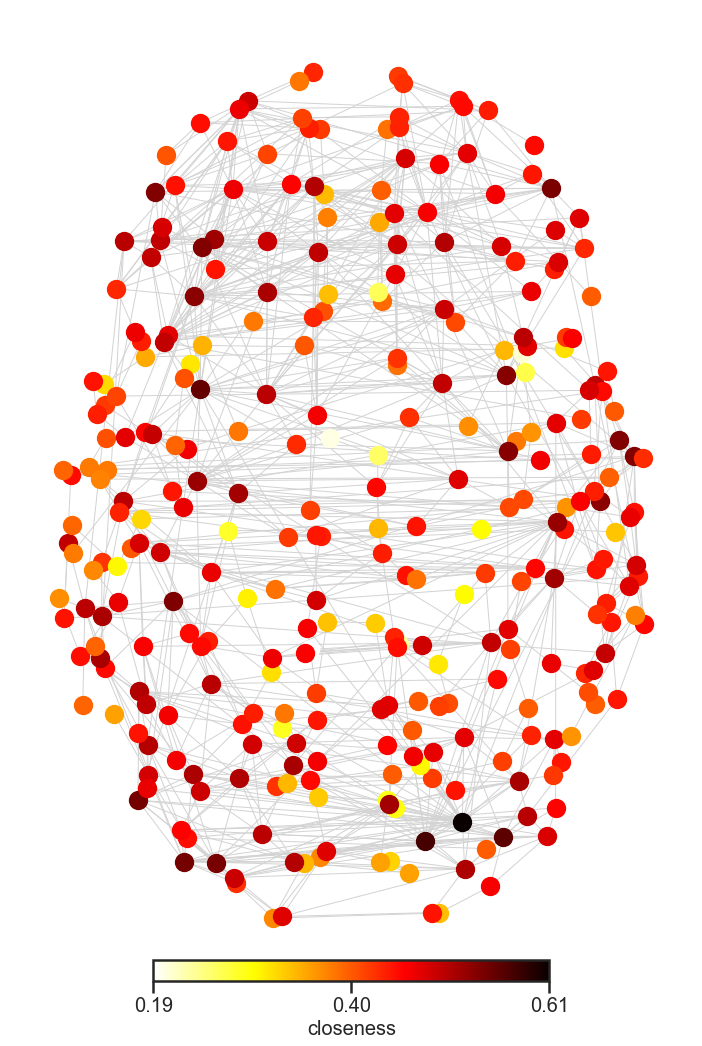

In [68]:
fig, ax = plt.subplots(figsize=(11,15))


# And then loop through each node and add it in order
for node in node_order:
    aaa = nx.draw_networkx_nodes(H,                                  # A networkx graph
                            pos=pos,                           # A dict with nodes as keys and positions as values.
                            node_color=colors_list[node],       # color for each node
                            nodelist=[node],                   # Draw only this one node
                            ax=ax)

# and drwa all edges
nx.draw_networkx_edges(G2,   # plotting for thresholded edges G2
                        pos=pos,
                        edgelist=edge_list_G2,
                        edge_color = "lightgrey",
                        ax=ax)

# while drawing, use 2% threshold of Graph

# remove the top and right spines from plot


#plt.tight_layout()

# fig.savefig("Original", bbox_inches=0, dpi=100)


# ax2 = fig.add_subplot(199, xticklabels=[], yticklabels=[])

# vmin = min(nodal_measures[measure].values)
# vmax = max(nodal_measures[measure].values)
# norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# cb = mpl.colorbar.ColorbarBase(ax2, cmap="hot_r",
#                                 norm=norm,
#                                 orientation='vertical')


# ax2 = fig.add_subplot(15, 1, 15, xticklabels=[], yticklabels=[])

# vmin = min(nodal_measures[measure].values)
# vmax = max(nodal_measures[measure].values)
# norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# ticks = [vmin, np.average([vmin, vmax]), vmax]

# cb = mpl.colorbar.ColorbarBase(ax2, cmap="hot_r",
#                                 norm=norm,
#                                 ticks=[],
                                
#                                 # shrink = 0.1,
#                                 orientation='horizontal')

plt.tight_layout()
sns.despine(top=True, right=True, left=True, bottom=True)

###############
# The dimensions [left, bottom, width, height] of the new axes
ax2 = fig.add_axes([0.25,0.05,0.5,0.02], xticklabels=[], yticklabels=[])

vmin = min(nodal_measures[measure].values)
vmax = max(nodal_measures[measure].values)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# ticks = [round(vmin,2), round((vmin+vmax)/2,2), round(vmax,2)]
ticks = [vmin, (vmin+vmax)/2, vmax]

cb = mpl.colorbar.ColorbarBase(ax2, cmap="hot_r",
                                norm=norm,
                                ticks=ticks,
                                format='%.2f',
                                # boundaries=np.linspace(vmin, vmax, 500),
                                orientation='horizontal')

cb.set_label(measure, size=20)
ax2.tick_params(labelsize=20)

# plt.subplots_adjust(top=1)

# plt.tight_layout()



fig.savefig("BBB", bbox_inches=0, dpi=100)

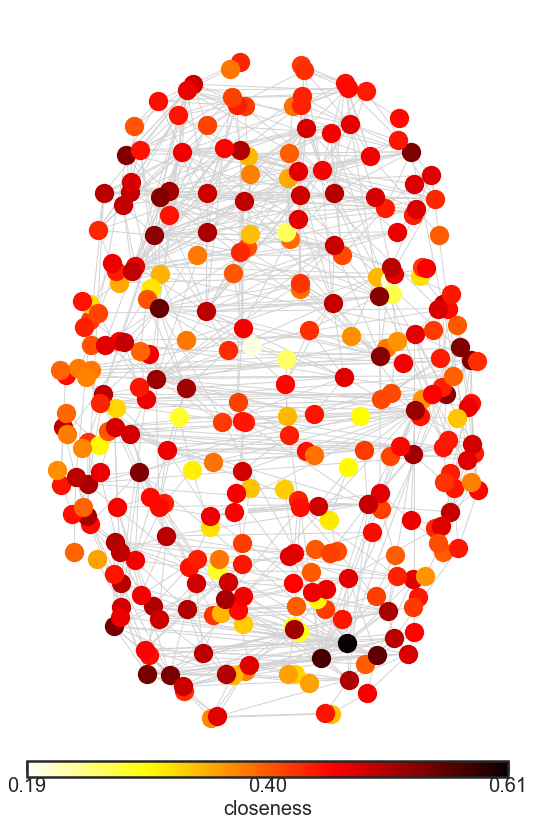

In [70]:
fig, ax = plt.subplots(figsize=(9,12))


# And then loop through each node and add it in order
for node in node_order:
    nx.draw_networkx_nodes(H,                                  # A networkx graph
                            pos=pos,                           # A dict with nodes as keys and positions as values.
                            node_color=colors_list[node],       # color for each node
                            nodelist=[node],                   # Draw only this one node
                            ax=ax)

# and drwa all edges
nx.draw_networkx_edges(G2,   # plotting for thresholded edges G2
                        pos=pos,
                        edgelist=edge_list_G2,
                        edge_color = "lightgrey",
                        ax=ax)


ax2 = fig.add_subplot(15, 1, 15, xticklabels=[], yticklabels=[])

vmin = min(nodal_measures[measure].values)
vmax = max(nodal_measures[measure].values)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# ticks = [round(vmin,2), round((vmin+vmax)/2,2), round(vmax,2)]
ticks = [vmin, (vmin+vmax)/2, vmax]

cb = mpl.colorbar.ColorbarBase(ax2, cmap="hot_r",
                                norm=norm,
                                ticks=ticks,
                                format='%.2f',
                                orientation='horizontal')



cb.set_label(measure, size=20)
ax2.tick_params(labelsize=20)

plt.tight_layout()

plt.subplots_adjust(top=1)


sns.despine(top=True, right=True, left=True, bottom=True)

fig.savefig("CCC", bbox_inches=0, dpi=100)

In [14]:
import matplotlib as mpl
grid = mpl.gridspec.GridSpec(2, 1)

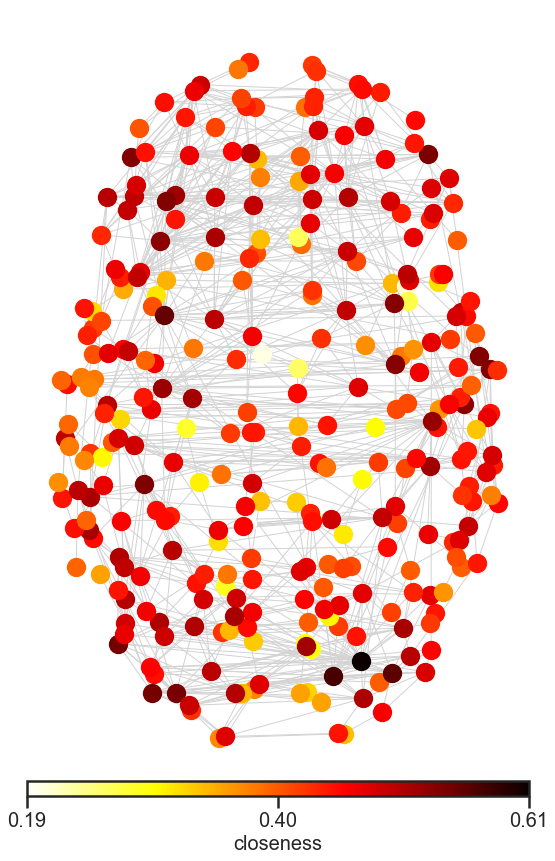

In [62]:
big_fig = plt.figure(figsize=(9,12))

grid = mpl.gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[50,1], hspace=0) # Height rations of the rows and no space between brain plot and colorbar plot
grid.update(bottom=0.1, top=1)   # left=0, right=1, bottom=0, top=1

# Add an axis to the big_fig
ax_brain = plt.Subplot(big_fig, grid[0])
big_fig.add_subplot(ax_brain)


for node in node_order:
    nx.draw_networkx_nodes(H,          
                            pos=pos,
                            node_color=colors_list[node],
                            nodelist=[node],
                            ax=ax_brain)

nx.draw_networkx_edges(G2,  
                        pos=pos,
                        edgelist=edge_list_G2,
                        edge_color = "lightgrey",
                        ax=ax_brain)

# plt.tight_layout(rect=(0,0.05,1,1))

############################################
ax_cbar = plt.Subplot(big_fig, grid[1])
big_fig.add_subplot(ax_cbar)

vmin = min(nodal_measures[measure].values)
vmax = max(nodal_measures[measure].values)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

ticks = [vmin, (vmin+vmax)/2, vmax]

cb = mpl.colorbar.ColorbarBase(ax_cbar, cmap="hot_r",
                                norm=norm,
                                ticks=ticks,
                                format='%.2f',
                                orientation='horizontal')

cb.set_label(measure, size=20)
ax_cbar.tick_params(labelsize=20)

sns.despine(top=True, right=True, left=True, bottom=True)

big_fig.savefig("figures/ABCDEFGHIJSUKA", bbox_inches=0, dpi=100)

In [60]:
type(round(3.15,2))

float

In [64]:
sns.reset_orig()

In [76]:
vmin

0.19175515302935664

In [81]:
round(vmin,2)

0.19

In [84]:
round((vmin+vmax)/2,2)

0.4

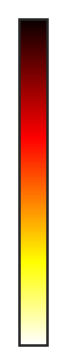

In [79]:
fig, ax = plt.subplots(figsize=(.5,6))

vmin = min(nodal_measures[measure].values)
vmax = max(nodal_measures[measure].values)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)


ticks = [vmin, np.average([vmin, vmax]), vmax]

cb = mpl.colorbar.ColorbarBase(ax,
                               cmap="hot_r",
                               norm=norm,
                               ticks=[],
                               orientation="vertical")

In [87]:
H.nodes[23]

{'betweenness': 0.005418019052698711,
 'centroids': array([-43.614049,  -6.016575, -40.149171]),
 'closeness': 0.4528023598820059,
 'clustering': 0.358974358974359,
 'degree': 27,
 'module': 1,
 'name': 'lh_inferiortemporal_part1',
 'participation_coefficient': 0.3950617283950617,
 'shortest_path_length': 2.2012987012987013,
 'x': -43.614049,
 'y': -6.016575,
 'z': -40.149171}

In [88]:
H.nodes[228]

{'betweenness': 4.628920313344566e-05,
 'centroids': array([ 13.789222, -34.572455,  71.667066]),
 'closeness': 0.3851944792973651,
 'clustering': 0.8333333333333334,
 'degree': 12,
 'module': 3,
 'name': 'rh_postcentral_part1',
 'participation_coefficient': 0.0,
 'shortest_path_length': 2.5876623376623376,
 'x': 13.789222,
 'y': -34.572455,
 'z': 71.667066}

## Color Experimenting

In [327]:
cmap_name = "jet"

In [328]:
cmap = plt.get_cmap(cmap_name)

In [329]:
type(cmap)

matplotlib.colors.LinearSegmentedColormap

In [330]:
sorted(set(nodal_measures[measure]))

[0, 1, 2, 3]

In [331]:
colors_dict = dict()
num_color = 4

In [332]:
for i, value in enumerate(sorted(set(nodal_measures[measure]))):
    colors_dict[value] = cmap((i+0.5)/num_color)

In [333]:
colors_dict

{0: (0.0, 0.00196078431372549, 1.0, 1.0),
 1: (0.08538899430740036, 1.0, 0.8823529411764706, 1.0),
 2: (0.8950031625553446, 1.0, 0.07273877292852626, 1.0),
 3: (1.0, 0.11692084241103862, 0.0, 1.0)}

In [335]:
colors_list = [ colors_dict[value] for value in nodal_measures[measure].values ]

In [336]:
colors_list

[(0.0, 0.00196078431372549, 1.0, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (0.08538899430740036, 1.0, 0.8823529411764706, 1.0),
 (0.8950031625553446, 1.0, 0.07273877292852626, 1.0),
 (0.8950031625553446, 1.0, 0.07273877292852626, 1.0),
 (0.8950031625553446, 1.0, 0.07273877292852626, 1.0),
 (0.8950031625553446, 1.0, 0.07273877292852626, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (0.08538899430740036, 1.0, 0.8823529411764706, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (0.08538899430740036, 1.0, 0.8823529411764706, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (1.0, 0.11692084241103862, 0.0, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (1.0, 0.11692084241103862, 0.0, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (1.0, 0.11692084241103862, 0.0, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0),
 (0.0, 0.00196078431372549, 1.0, 1.0)

In [351]:
sns_palette = "hls"

In [352]:
color_palette = sns.color_palette(sns_palette, 20)

In [353]:
color_palette

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5272, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.86, 0.8392000000000002, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.42320000000000013),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.86, 0.7352000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6727999999999997, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.33999999999999997, 0.36079999999999973, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7767999999999993),
 (0.86, 0.33999999999999997, 0.6207999999999999),
 (0.86, 0.33999999999999997, 0.46479999999999977)]

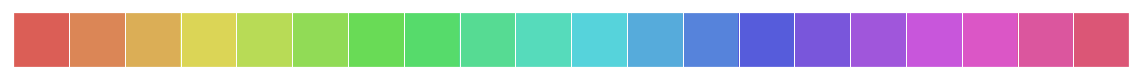

In [354]:
sns.palplot(color_palette)

In [296]:
measure = "module"

In [201]:
nodal_measures

name                             centroids  \
0                   lh_bankssts_part1     [-56.40355, -40.152663, 1.708876]   
1                   lh_bankssts_part2    [-53.140506, -49.843038, 8.264557]   
2    lh_caudalanteriorcingulate_part1     [-5.001684, 20.645903, 25.733446]   
3        lh_caudalmiddlefrontal_part1    [-33.265925, 20.200202, 45.347826]   
4        lh_caudalmiddlefrontal_part2      [-31.958115, 2.146597, 51.26911]   
5        lh_caudalmiddlefrontal_part3    [-38.795007, 12.584757, 33.278581]   
6        lh_caudalmiddlefrontal_part4    [-39.715079, 11.341351, 48.846438]   
7                     lh_cuneus_part1    [-8.609127, -73.360119, 17.095238]   
8                     lh_cuneus_part2      [-5.3042, -87.102157, 19.323496]   
9                 lh_entorhinal_part1    [-24.010774, -5.86141, -32.826641]   
10                  lh_fusiform_part1  [-30.237677, -46.493585, -17.452397]   
11                  lh_fusiform_part2   [-34.771765, -9.299608, -35.172549]   
12                  lh_fusiform_part3  [-33.515847, -72.220765, -14.257923]   
13                  lh_fusiform_part4    [-37.632472, -38.758481, -22.9063]   
14                  lh_fusiform_part5  [-38.896698, -60.874682, -16.663844]   
15          lh_inferiorparietal_part1   [-43.393728, -58.809524, 40.471545]   
16          lh_inferiorparietal_part2   [-35.980519, -83.125541, 18.926407]   
17          lh_inferiorparietal_part3   [-44.904486, -56.280753, 17.439942]   
18          lh_inferiorparietal_part4   [-31.993691, -75.483701, 33.056782]   
19          lh_inferiorparietal_part5    [-43.132353, -66.558824, 15.90625]   
20          lh_inferiorparietal_part6   [-37.122661, -69.533264, 43.258836]   
21          lh_inferiorparietal_part7    [-43.26638, -75.049409, 23.400644]   
22          lh_inferiorparietal_part8   [-45.069149, -64.283245, 32.022606]   
23          lh_inferiortemporal_part1   [-43.614049, -6.016575, -40.149171]   
24          lh_inferiortemporal_part2   [-50.245499, -60.608838, -7.837971]   
25          lh_inferiortemporal_part3  [-48.242567, -19.479656, -32.479656]   
26          lh_inferiortemporal_part4  [-52.185499, -51.758004, -16.904896]   
27          lh_inferiortemporal_part5   [-52.818271, -31.30943, -26.385069]   
28          lh_inferiortemporal_part6  [-52.835546, -41.770174, -22.660878]   
29          lh_isthmuscingulate_part1     [-8.616947, -48.171793, 7.731863]   
..                                ...                                   ...   
278         rh_superiorparietal_part1     [23.584713, -81.495541, 24.36051]   
279         rh_superiorparietal_part2    [14.988916, -47.232759, 68.312808]   
280         rh_superiorparietal_part3     [15.733461, -85.22627, 34.587728]   
281         rh_superiorparietal_part4    [22.034121, -75.393701, 40.053806]   
282         rh_superiorparietal_part5    [23.849231, -65.156923, 38.592308]   
283         rh_superiorparietal_part6    [29.590909, -46.771562, 61.291375]   
284         rh_superiorparietal_part7          [13.05875, -68.865, 53.7025]   
285         rh_superiorparietal_part8    [33.208925, -44.119675, 46.361055]   
286         rh_superiorparietal_part9     [18.519651, -59.15393, 61.758734]   
287        rh_superiorparietal_part10    [30.873267, -53.879208, 51.443564]   
288         rh_superiortemporal_part1    [45.127378, 10.190275, -23.683404]   
289         rh_superiortemporal_part2     [60.395197, -31.749636, 9.372635]   
290         rh_superiortemporal_part3     [53.179974, 1.882853, -14.544503]   
291         rh_superiortemporal_part4      [56.760262, -7.716835, -6.30815]   
292         rh_superiortemporal_part5     [59.154909, -22.562182, 3.008727]   
293         rh_superiortemporal_part6    [51.438479, -17.538404, -3.435496]   
294            rh_supramarginal_part1     [42.910714, -34.25487, 40.887987]   
295            rh_supramarginal_part2     [45.033989, -24.93381, 18.411449]   
296            rh_supramarginal_part3     [52.15208, -41.395983, 41.955524]   
297 

In [202]:
vmax = max(nodal_measures[measure].values)
vmin = min(nodal_measures[measure].values)

In [203]:
vmax

126

In [204]:
vmin

1

In [205]:
# 1)
norm = mpl.colors.Normalize(vmin=0,vmax=1)

In [206]:
norm(0.450147)

0.450147

In [207]:
norm(0.333333)

0.333333

In [208]:
# 2)
norm2 = mpl.colors.Normalize(vmin=vmin,vmax=vmax)

In [209]:
norm2(0.450147)

-0.004398823999999999

In [210]:
norm2(0.333333)

-0.005333336

If vmin or vmax is not given, they are initialized from the minimum and maximum value respectively of the first input processed. 

In [211]:
scalarMap2 = mpl.cm.ScalarMappable(norm=norm2, cmap="jet")

In [252]:
scalarMap2.get_clim()

(1, 126)

In [213]:
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap="jet")

In [214]:
scalarMap.get_clim()

(0, 1)

In [215]:
scalarMap.to_rgba(0.4789)

(0.4142947501581275, 1.0, 0.5534471853257434, 1.0)

In [216]:
scalarMap2.to_rgba(0.4789)

(0.0, 0.0, 0.5, 1.0)

In [240]:
colors_list = [ scalarMap.to_rgba(x) for x in nodal_measures[measure] ]

In [241]:
colors_list2 = [ scalarMap2.to_rgba(x) for x in nodal_measures[measure] ]

In [242]:
colors_list == colors_list2

False

In [243]:
colors_list[31] in colors_list2

True

In [247]:
tr = 0
fl = 0

for i in colors_list:
    if i in colors_list2:
        tr += 1
    else:
        fl += 1

In [248]:
fl

0

In [249]:
tr

308

In [250]:
colors_list

[(0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0, 0.0, 1.0),
 (0.5, 0.0,

In [251]:
scalarMap.get_clim()

(0, 1)

In [258]:
scalarMap.to_rgba(10)

(0.5, 0.0, 0.0, 1.0)

In [224]:
colors_list[4]

(0.5, 0.0, 0.0, 1.0)

In [232]:
colors_list2.index(colors_list[4])

278

#### Color for Discrete Data

In [63]:
import importlib.util
spec = importlib.util.spec_from_file_location("plot_anatomical_network", "/home/pilot/GSoC/scona/scona/brain_imaging.py")
bar = importlib.util.module_from_spec(spec)
spec.loader.exec_module(bar)

In [64]:
G10.calculate_nodal_measures()

In [6]:
G10 = G.threshold(10)
G02 = G.threshold(2)

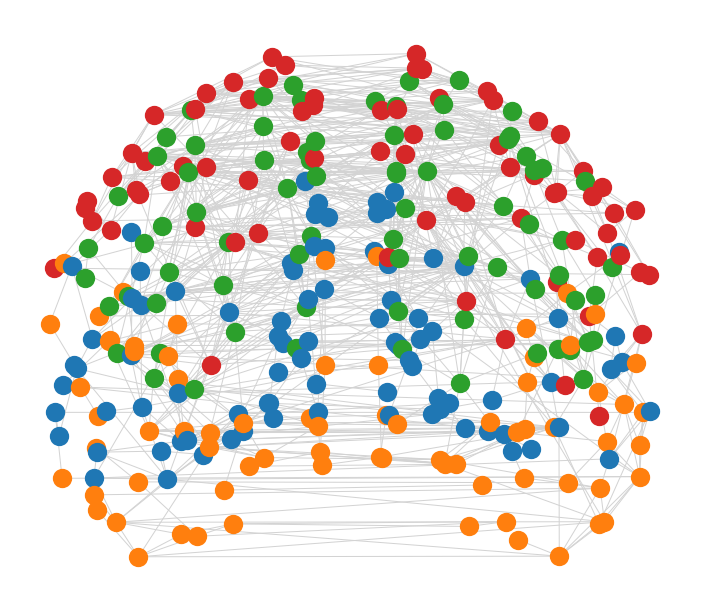

In [9]:
bar.plot_anatomical_network(G10, G02, measure="module")

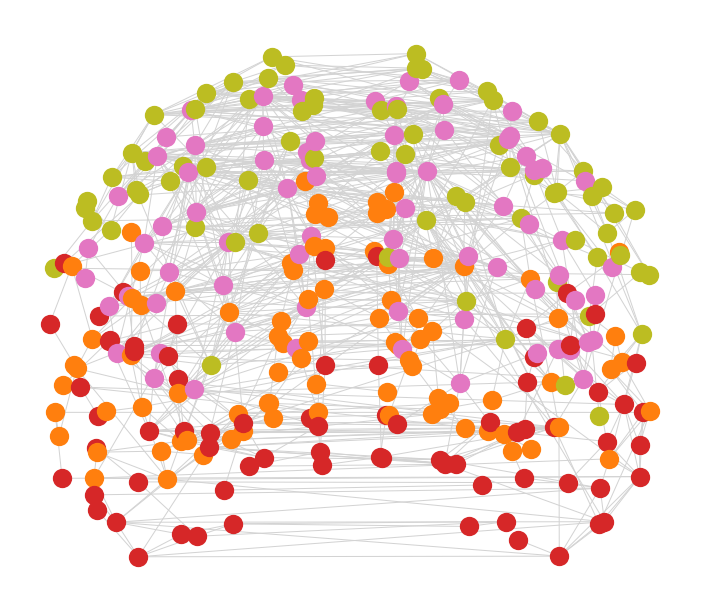

In [11]:
bar.plot_anatomical_network(G10, G02, measure="module")

### Making figures publication-ready -> make figures to look like brains

In [115]:
import importlib.util
spec = importlib.util.spec_from_file_location("plot_anatomical_network", "/home/pilot/GSoC/scona/scona/visualisations.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

In [97]:
G10 = G.threshold(10)

G02 = G.threshold(2)

In [98]:
# report the nodal attributes of Graph
G10.calculate_nodal_measures()

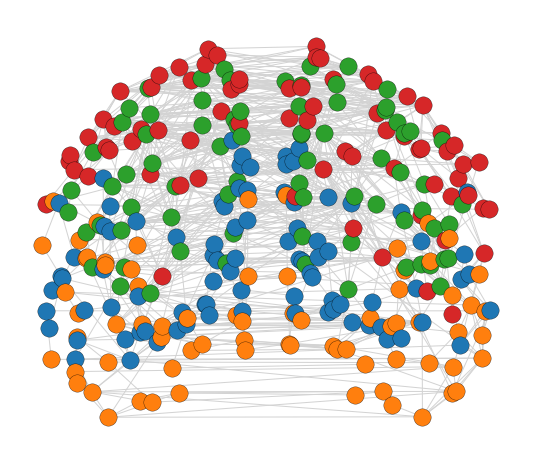

In [116]:
foo.plot_anatomical_network(G10, G02, orientation="sagittal", 
                        figure_name="figures/Sagittal")

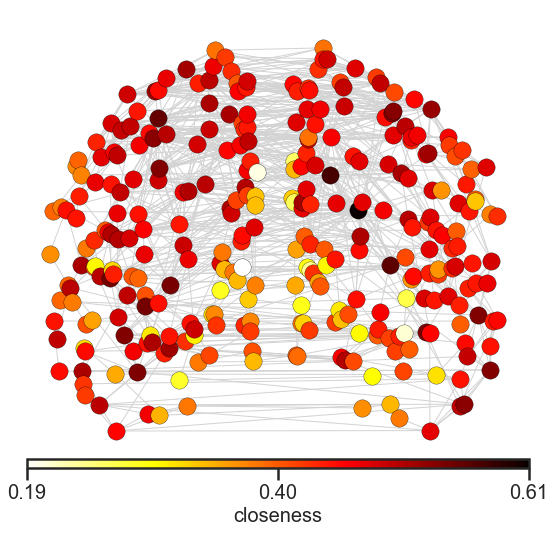

In [117]:
foo.plot_anatomical_network(G10, G02, orientation="sagittal", continuous="True", measure="closeness", cmap_name="hot_r", 
                        figure_name="figures/Sagittal_Contin")

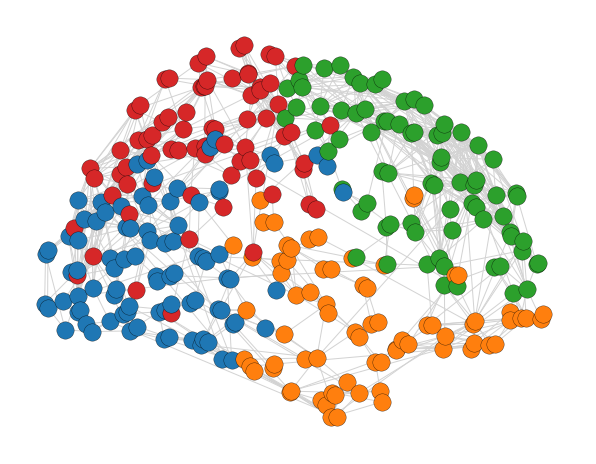

In [118]:
foo.plot_anatomical_network(G10, G02, orientation="coronal", 
                        figure_name="figures/Coronal")

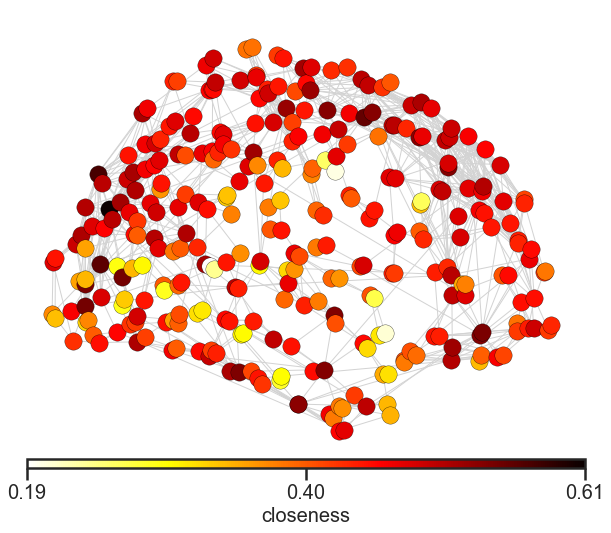

In [119]:
foo.plot_anatomical_network(G10, G02, orientation="coronal", continuous="True", measure="closeness", cmap_name="hot_r", 
                        figure_name="figures/Coronal_Contin")

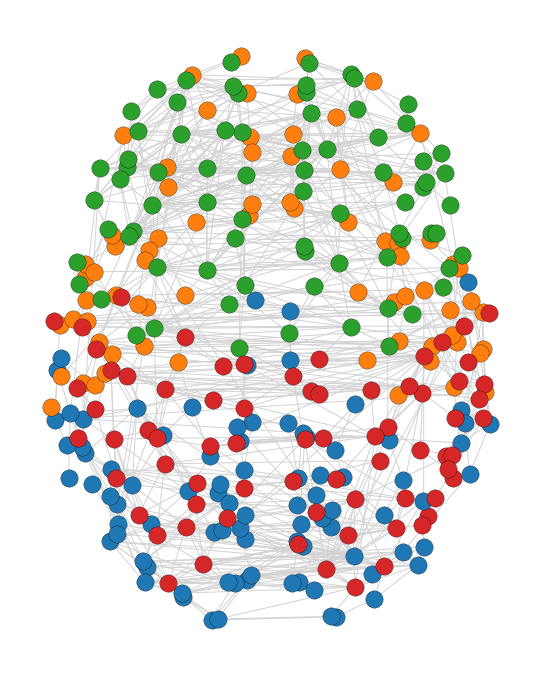

In [120]:
foo.plot_anatomical_network(G10, G02, orientation="axial", 
                        figure_name="figures/Axial")

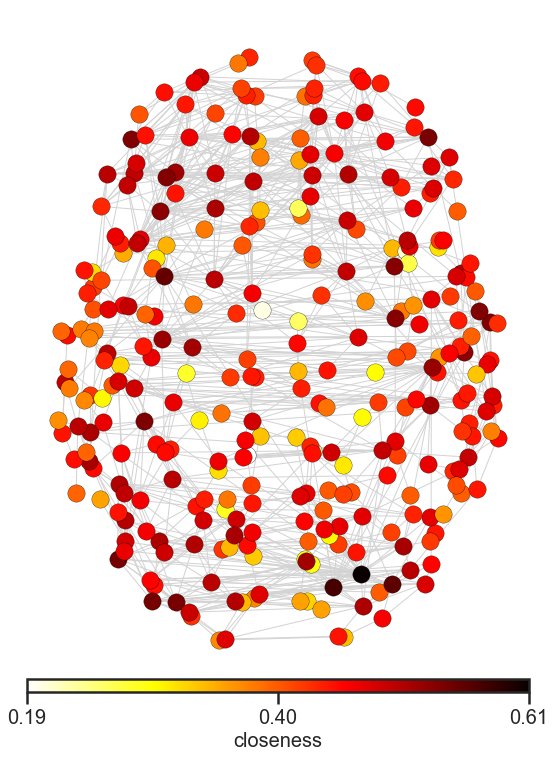

In [121]:
foo.plot_anatomical_network(G10, G02, orientation="axial", continuous="True", measure="closeness", cmap_name="hot_r", 
                        figure_name="figures/Axial_Contin")

# below is my 1st attemp to draw and it was pretty cool!

In [22]:
# hui znaet chto takoe df, so just skip that

In [27]:
# show me the degree of each node
print(len(H.degree))
dict(H.degree)

308


{0: 7,
 1: 6,
 2: 1,
 3: 25,
 4: 25,
 5: 10,
 6: 18,
 7: 6,
 8: 7,
 9: 4,
 10: 4,
 11: 3,
 12: 10,
 13: 12,
 14: 5,
 15: 5,
 16: 11,
 17: 11,
 18: 9,
 19: 10,
 20: 5,
 21: 2,
 22: 1,
 23: 7,
 24: 1,
 25: 9,
 26: 4,
 27: 3,
 28: 6,
 29: 1,
 30: 2,
 31: 11,
 32: 6,
 33: 6,
 34: 11,
 35: 5,
 36: 7,
 37: 13,
 38: 4,
 39: 15,
 40: 6,
 41: 2,
 42: 12,
 43: 7,
 44: 7,
 45: 3,
 46: 2,
 47: 2,
 48: 1,
 49: 3,
 50: 3,
 51: 4,
 52: 2,
 53: 2,
 54: 1,
 55: 1,
 56: 3,
 57: 2,
 58: 2,
 59: 3,
 60: 4,
 61: 3,
 62: 2,
 63: 8,
 64: 2,
 65: 3,
 66: 11,
 67: 11,
 68: 8,
 69: 4,
 70: 2,
 71: 5,
 72: 1,
 73: 14,
 74: 3,
 75: 13,
 76: 5,
 77: 10,
 78: 8,
 79: 1,
 80: 1,
 81: 3,
 82: 4,
 83: 4,
 84: 1,
 85: 11,
 86: 19,
 87: 3,
 88: 6,
 89: 6,
 90: 1,
 91: 4,
 92: 5,
 93: 3,
 94: 3,
 95: 4,
 96: 3,
 97: 3,
 98: 5,
 99: 3,
 100: 17,
 101: 10,
 102: 12,
 103: 6,
 104: 24,
 105: 17,
 106: 8,
 107: 11,
 108: 1,
 109: 6,
 110: 10,
 111: 22,
 112: 8,
 113: 8,
 114: 20,
 115: 3,
 116: 20,
 117: 9,
 118: 15,
 119: 1

In [50]:
H.node[0]["centroids"]

array([-56.40355 , -40.152663,   1.708876])

In [51]:
H.node[0]["x"]

-56.40355

In [52]:
H.node[0]["y"]

-40.152663

In [53]:
H.node[0]["z"]

1.708876

All graph values undertood

---------------------------------

In [86]:
import importlib.util
spec = importlib.util.spec_from_file_location("anatomical_layout", "/home/pilot/GSoC/scona/scona/make_figures.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

In [131]:
# some parameters

orientation='sagittal'
node_size=500
node_shape='o'
edge_width=0.2

In [88]:
pos = {node: foo.anatomical_layout(G.node[node]['x'], G.node[node]['y'], G.node[node]['z'], orientation=orientation) 
           for node in G.nodes}

In [89]:
pos

{0: array([-56.40355 ,   1.708876]),
 1: array([-53.140506,   8.264557]),
 2: array([-5.001684, 25.733446]),
 3: array([-33.265925,  45.347826]),
 4: array([-31.958115,  51.26911 ]),
 5: array([-38.795007,  33.278581]),
 6: array([-39.715079,  48.846438]),
 7: array([-8.609127, 17.095238]),
 8: array([-5.3042  , 19.323496]),
 9: array([-24.010774, -32.826641]),
 10: array([-30.237677, -17.452397]),
 11: array([-34.771765, -35.172549]),
 12: array([-33.515847, -14.257923]),
 13: array([-37.632472, -22.9063  ]),
 14: array([-38.896698, -16.663844]),
 15: array([-43.393728,  40.471545]),
 16: array([-35.980519,  18.926407]),
 17: array([-44.904486,  17.439942]),
 18: array([-31.993691,  33.056782]),
 19: array([-43.132353,  15.90625 ]),
 20: array([-37.122661,  43.258836]),
 21: array([-43.26638 ,  23.400644]),
 22: array([-45.069149,  32.022606]),
 23: array([-43.614049, -40.149171]),
 24: array([-50.245499,  -7.837971]),
 25: array([-48.242567, -32.479656]),
 26: array([-52.185499, -16.

In [95]:
foo.anatomical_layout(G.node[0]['x'], G.node[0]['y'], G.node[0]['z'], orientation=orientation)

array([-56.40355 ,   1.708876])

In [93]:
foo.sagittal_layout(G.node[0]['x'], G.node[0]['y'], G.node[0]['z'])

array([-56.40355 ,   1.708876])

In [96]:
print(G.node[0]['x'], G.node[0]['y'], G.node[0]['z'])

-56.40355 -40.152663 1.708876


In [97]:
np.array([G.node[0]['x'], G.node[0]['y']])

array([-56.40355 , -40.152663])

In [105]:

# create the same size for each node

node_size_list = [ node_size ] * len(node_list)

In [106]:
node_size_list

[500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500,
 500

In [107]:
len(node_size_list)

308

In [110]:
# If you have no rich club nodes then all the nodes will
    # have the same shape
node_shape_list = [ node_shape ] * len(node_list)

In [112]:
len(node_shape_list)

308

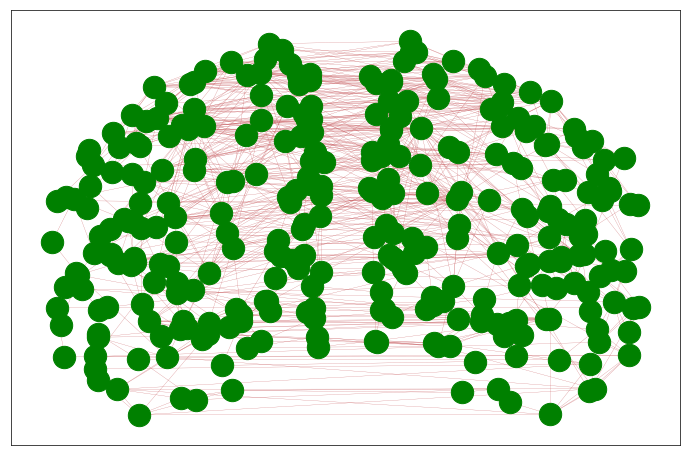

In [140]:
#### PLOT THE BRAIN

# Create a figure
fig_size_dict = {}
fig_size_dict['axial'] = (9,12)
fig_size_dict['sagittal'] = (12,8)
fig_size_dict['coronal'] = (9,8)

fig, ax = plt.subplots(figsize=fig_size_dict[orientation])

# Set the seaborn context and style
# sns.set(style="white")
# sns.set_context("poster", font_scale=2)    # sns.reset_orig()

# Start by drawing in the edges:

nx.draw_networkx_edges(H,
                        pos=pos,
                        edgelist=edge_list,
                        width=edge_width,
                        edge_color="r",
                        ax=ax)

# And then loop through each node and add it in order
for node in node_list:
    nx.draw_networkx_nodes(H,                                  # A networkx graph
                            pos=pos,                           # A dict with nodes as keys and positions as values.
                            node_color="green",                # 
                            node_shape=node_shape_list[node],  # The shape of the node.
                            node_size=node_size_list[node],    # Size of nodes
                            nodelist=[node],                   # Draw only specified nodes
                            ax=ax) 

USE THE IMPLEMENTED FUNCTION

In [151]:
import importlib.util
spec = importlib.util.spec_from_file_location("plot_anatomical_network", "/home/pilot/GSoC/scona/scona/brain_imaging.py")
bar = importlib.util.module_from_spec(spec)
spec.loader.exec_module(bar)

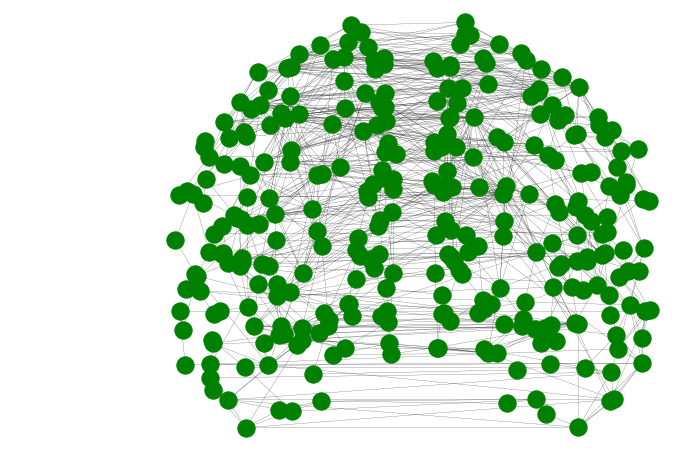

In [152]:
bar.plot_anatomical_network(H, orientation="sagittal")

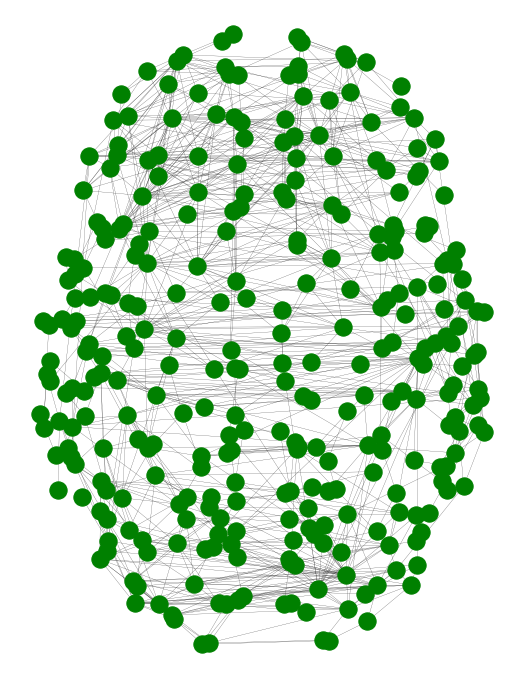

In [154]:
bar.plot_anatomical_network(H, orientation="axial")

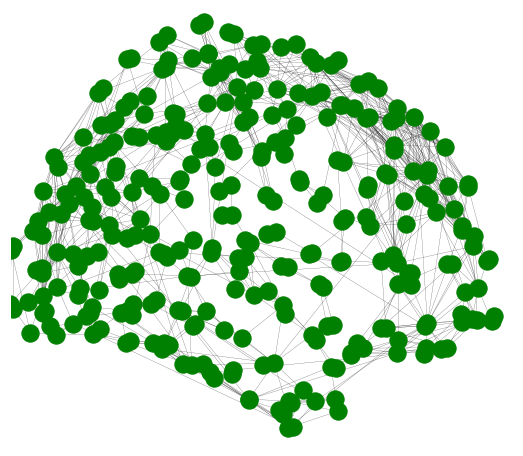

In [155]:
bar.plot_anatomical_network(H, orientation="coronal")

Color Ebatnya
- Use a colormap to set colors for each value in the
    sort_measure and return a list of colors for each node

In [156]:
cmap_name='jet'
sns_palette=None
measure='module'
continuous=False
vmax=1
vmin=0

In [157]:
nodes = [1,2,3,4,5]

In [158]:
colors_dict = {}

In [159]:
# Figure out how many different colors you need
n = np.float(len(nodes))

In [164]:
# Get a colormap instance
# If name is a matplotlib.colors.Colormap instance, it will be returned
cmap = plt.get_cmap(cmap_name)

In [166]:
for i, mod in enumerate(sorted(set(nodes))):
    colors_dict[mod] = cmap((i+0.5)/n)
    print(i, mod)

0 1
1 2
2 3
3 4
4 5


In [167]:
colors_dict

{1: (0.0, 0.0, 0.945632798573975, 1.0),
 2: (0.0, 0.692156862745098, 1.0, 1.0),
 3: (0.4901960784313725, 1.0, 0.4775458570524984, 1.0),
 4: (1.0, 0.7705156136528688, 0.0, 1.0),
 5: (0.9456327985739753, 0.029774872912127992, 0.0, 1.0)}

In [168]:
colors_list = [ colors_dict[mod] for mod in nodes ]

In [169]:
colors_list

[(0.0, 0.0, 0.945632798573975, 1.0),
 (0.0, 0.692156862745098, 1.0, 1.0),
 (0.4901960784313725, 1.0, 0.4775458570524984, 1.0),
 (1.0, 0.7705156136528688, 0.0, 1.0),
 (0.9456327985739753, 0.029774872912127992, 0.0, 1.0)]